<a href="https://colab.research.google.com/github/surabhipandey18/Deep-Learning/blob/main/alexnet_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras import layers, models, optimizers, regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, AdamW
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D
from tensorflow.keras.utils import plot_model
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data() #load
def preprocess(image, label):
    image = tf.expand_dims(image, -1)
    image = tf.image.resize(image, (227, 227))
    image = tf.cast(image, tf.float32) / 255.0
    label = tf.one_hot(label, depth=10)
    return image, label

ds_train = tf.data.Dataset.from_tensor_slices((x_train, y_train))
ds_train = ds_train.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)

ds_test = tf.data.Dataset.from_tensor_slices((x_test, y_test))
ds_test = ds_test.map(preprocess).batch(64).prefetch(tf.data.AUTOTUNE)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


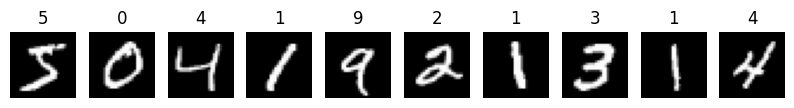

In [3]:
#see the images first 10
plt.figure(figsize=(10, 2))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i], cmap="gray")
    plt.title(y_train[i])
    plt.axis("off")
plt.show()

In [4]:
#let's create the model
def alexnet(weight_decay=0.0):
    model = models.Sequential([
        layers.Conv2D(64, (11, 11), strides=4, activation='relu', input_shape=(227, 227, 1), padding='same'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(192, (5, 5), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Conv2D(384, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.Conv2D(256, (3, 3), padding='same', activation='relu'),
        layers.MaxPooling2D((3, 3), strides=2),
        layers.Flatten(),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
        layers.Dropout(0.5),
        layers.Dense(4096, activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),
        layers.Dropout(0.5),
        layers.Dense(10, activation='softmax')
    ])
    return model

optimizers = [('Adam', Adam(learning_rate=1e-3)),('AdamW', AdamW(weight_decay=1e-4, learning_rate=1e-3))]
histories={}

In [5]:
for opt_name, optimizer in optimizers:
    print(f"\nTraining with {opt_name} optimizer.")
    model = alexnet(weight_decay=1e-4 if opt_name == 'AdamW' else 0.0)
    plot_model(model, to_file=f'{opt_name}_model_architecture.png', show_shapes=True, show_layer_names=True)
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
    with tf.device('/GPU:0'):
      history = model.fit(
        ds_train,
        epochs=5,
        validation_data=ds_test
    )
    histories[opt_name] = history


Training with Adam optimizer.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 74s 66ms/step - accuracy: 0.8154 - loss: 0.5540 - val_accuracy: 0.9810 - val_loss: 0.0580
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 52s 56ms/step - accuracy: 0.9775 - loss: 0.0761 - val_accuracy: 0.9780 - val_loss: 0.0707
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 57ms/step - accuracy: 0.9829 - loss: 0.0606 - val_accuracy: 0.9856 - val_loss: 0.0477
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 57ms/step - accuracy: 0.9847 - loss: 0.0554 - val_accuracy: 0.9827 - val_loss: 0.0568
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 83s 59ms/step - accuracy: 0.9874 - loss: 0.0456 - val_accuracy: 0.9868 - val_loss: 0.0561

Training with AdamW optimizer.


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 65s 63ms/step - accuracy: 0.8146 - loss: 0.8070 - val_accuracy: 0.9672 - val_loss: 0.2107
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 73s 58ms/step - accuracy: 0.9784 - loss: 0.1658 - val_accuracy: 0.9785 - val_loss: 0.1517
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 82s 58ms/step - accuracy: 0.9823 - loss: 0.1423 - val_accuracy: 0.9850 - val_loss: 0.1293
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 53s 56ms/step - accuracy: 0.9847 - loss: 0.1364 - val_accuracy: 0.9902 - val_loss: 0.1043
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 85s 60ms/step - accuracy: 0.9864 - loss: 0.1192 - val_accuracy: 0.9888 - val_loss: 0.1047


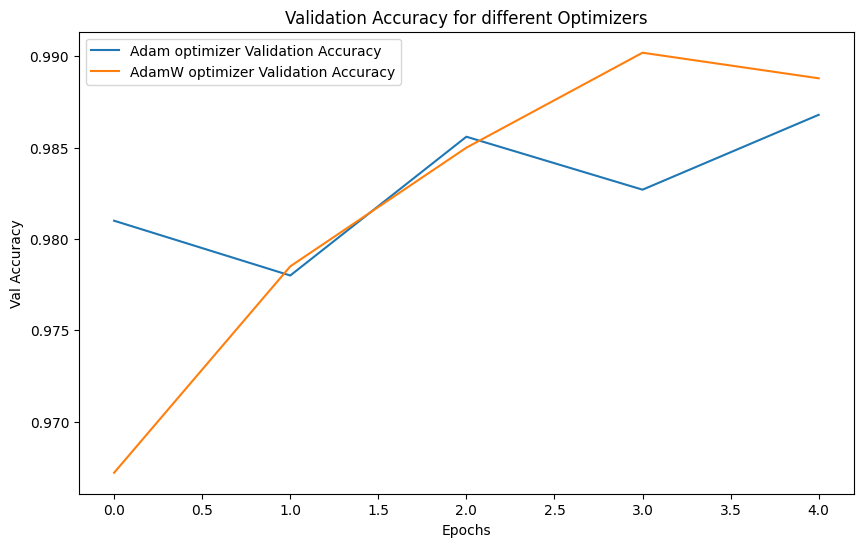

In [6]:
#figure of different optimizers working
plt.figure(figsize=(10, 6))
for opt_name, optimizer in optimizers:
    plt.plot(histories[opt_name].history['val_accuracy'], label=f"{opt_name} optimizer Validation Accuracy")
plt.title("Validation Accuracy for different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Val Accuracy")
plt.legend()
plt.show()

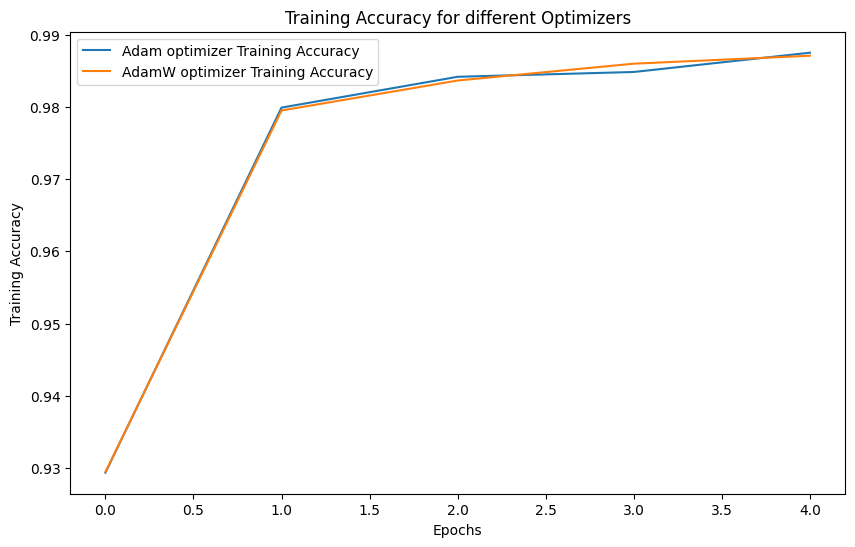

In [9]:
#figure of training accuracy
plt.figure(figsize=(10, 6))
for opt_name, optimizer in optimizers:
    plt.plot(histories[opt_name].history['accuracy'], label=f"{opt_name} optimizer Training Accuracy")
plt.title("Training Accuracy for different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Training Accuracy")
plt.legend()
plt.show()

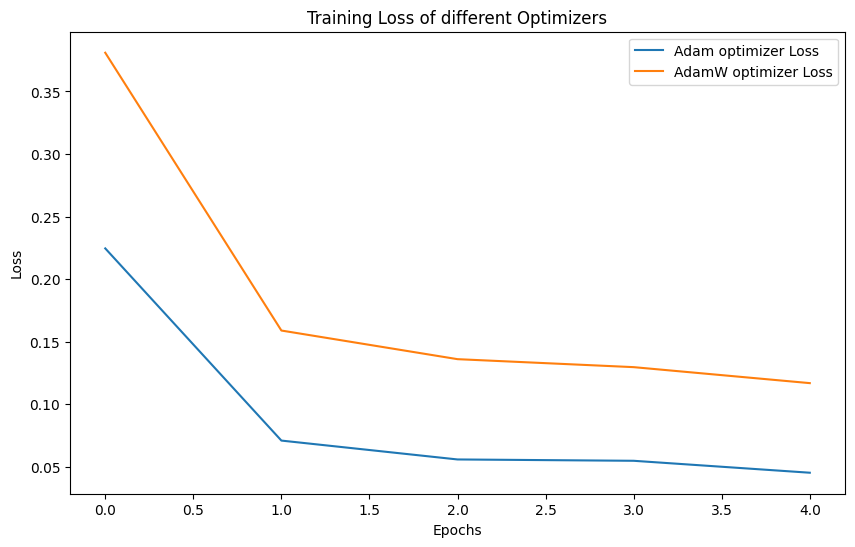

In [10]:
#figure of different loss of optimizers
plt.figure(figsize=(10, 6))
for opt_name,optimizer in optimizers:
    plt.plot(histories[opt_name].history['loss'], label=f"{opt_name} optimizer Loss")
plt.title("Training Loss of different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

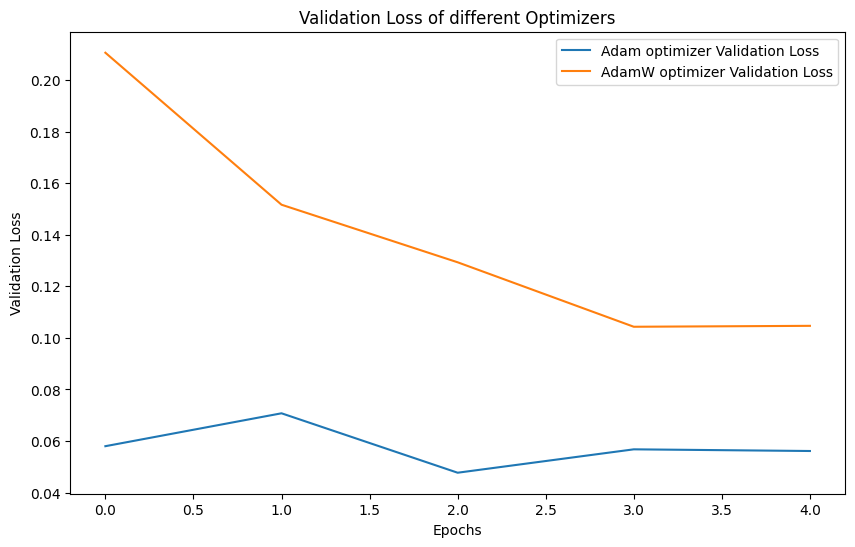

In [11]:
#figure of different loss of optimizers (validation)
plt.figure(figsize=(10, 6))
for opt_name,optimizer in optimizers:
    plt.plot(histories[opt_name].history['val_loss'], label=f"{opt_name} optimizer Validation Loss")
plt.title("Validation Loss of different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.legend()
plt.show()

In [8]:
#tabulating all
for opt_name,optimizer in optimizers:
    val_accuracy = histories[opt_name].history['val_accuracy'][-1]
    loss = histories[opt_name].history['loss'][-1]
    print(f"{opt_name} → Val Accuracy: {val_accuracy:.4f}, Val Loss: {loss:.4f}")

Adam → Val Accuracy: 0.9868, Val Loss: 0.0453
AdamW → Val Accuracy: 0.9888, Val Loss: 0.1169
